In [170]:
# If you'd like to try this lab with PCA instead of Isomap,
# as the dimensionality reduction technique:
Test_PCA = True

In [171]:
def plotDecisionBoundary(model, X, y):
  print("Plotting...")
  import matplotlib.pyplot as plt
  import matplotlib
  matplotlib.style.use('ggplot') # Look Pretty

  fig = plt.figure()
  ax = fig.add_subplot(111)

  padding = 0.1
  resolution = 0.1

  #(2 for benign, 4 for malignant)
  colors = {2:'royalblue',4:'lightsalmon'} 

  
  # Calculate the boundaris
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()
  x_range = x_max - x_min
  y_range = y_max - y_min
  x_min -= x_range * padding
  y_min -= y_range * padding
  x_max += x_range * padding
  y_max += y_range * padding

  # Create a 2D Grid Matrix. The values stored in the matrix
  # are the predictions of the class at at said location
  import numpy as np
  xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

  # What class does the classifier say?
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the contour map
  plt.contourf(xx, yy, Z, cmap=plt.cm.seismic)
  plt.axis('tight')

  # Plot your testing points as well...
  for label in np.unique(y):
    indices = np.where(y == label)
    plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], alpha=0.8)

  p = model.get_params()
  plt.title('K = ' + str(p['n_neighbors']))
  plt.show()

In [172]:
import random, math
import pandas as pd
import numpy as np
import scipy.io

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib

In [173]:
# TODO: Load in the dataset, identify nans, and set proper headers.
# Be sure to verify the rows line up by looking at the file in a text editor.
df = pd.read_csv('C:/Users/t.bugaevskiy/Desktop/edX/08_DAT_210x_Programming_with_Python_for_Data_Science/Module5/Datasets/breast-cancer-wisconsin.data',
                 header = None, na_values=["?"])
df.columns = ['sample', 'thickness', 'size', 'shape', 'adhesion', 'epithelial', 'nuclei', 
              'chromatin', 'nucleoli', 'mitoses', 'status']
#df = pd.DataFrame(df)
df.dtypes

sample          int64
thickness       int64
size            int64
shape           int64
adhesion        int64
epithelial      int64
nuclei        float64
chromatin       int64
nucleoli        int64
mitoses         int64
status          int64
dtype: object

In [174]:
# TODO: Copy out the status column into a slice, then drop it from the main
# dataframe. Always verify you properly executed the drop by double checking
# (printing out the resulting operating)! Many people forget to set the right
# axis here.
#
# If you goofed up on loading the dataset and notice you have a `sample` column,
# this would be a good place to drop that too if you haven't already.
dfL = df['status']
dfL = pd.DataFrame(dfL)
del df['sample']
del df['status']
dfL

,status
0,2
1,2
2,2
3,2
4,2
5,4
6,2
7,2
8,2
9,2


In [175]:
df

,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
5,8,10,10,8,7,10.0,9,7,1
6,1,1,1,1,2,10.0,3,1,1
7,2,1,2,1,2,1.0,3,1,1
8,2,1,1,1,2,1.0,1,1,5
9,4,2,1,1,2,1.0,2,1,1


In [176]:
# TODO: With the labels safely extracted from the dataset, replace any nan values
# with the mean feature / column value
df = df.fillna(df.mean())
df[df.isnull().any(axis=1)]

,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses


In [177]:
# TODO: Experiment with the basic SKLearn preprocessing scalers. We know that
# the features consist of different units mixed in together, so it might be
# reasonable to assume feature scaling is necessary. Print out a description
# of the dataset, post transformation. Recall: when you do pre-processing,
# which portion of the dataset is your model trained upon? Also which portion(s)
# of your dataset actually get transformed?
from sklearn import preprocessing

#df = preprocessing.Normalizer().fit_transform(df)
#df = preprocessing.MinMaxScaler().fit_transform(df)
#df = preprocessing.StandardScaler().fit_transform(df)
#df = preprocessing.RobustScaler().fit_transform(df)
df = preprocessing.MaxAbsScaler().fit_transform(df)

In [178]:
# TODO: Do train_test_split. Use the same variable names as on the EdX platform in
# the reading material, but set the random_state=7 for reproduceability, and keep
# the test_size at 0.5 (50%).
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(df, dfL, test_size=0.5, random_state=7)

In [179]:
# PCA and Isomap are your new best friends
model = None
  
# TODO: Implement PCA here. Save your model into the variable 'model'.
# You should reduce down to two dimensions.  
if Test_PCA:
    print("Computing 2D Principle Components")
    from sklearn.decomposition import PCA
    model = PCA(n_components=2)
  
# TODO: Implement Isomap here. Save your model into the variable 'model'
# Experiment with K values from 5-10.
# You should reduce down to two dimensions.
else:
    print("Computing 2D Isomap Manifold")
    from sklearn import manifold
    model = manifold.Isomap(n_neighbors=5, n_components=2)

Computing 2D Principle Components


In [180]:
# TODO: Train your model against data_train, then transform both
# data_train and data_test using your model. You can save the results right
# back into the variables themselves.
model = model.fit(data_train)
data_train = model.transform(data_train)
data_test = model.transform(data_test)

In [181]:
# TODO: Implement and train KNeighborsClassifier on your projected 2D
# training data here. You can use any K value from 1 - 15, so play around
# with it and see what results you can come up. Your goal is to find a
# good balance where you aren't too specific (low-K), nor are you too
# general (high-K). You should also experiment with how changing the weights
# parameter affects the results.
from sklearn.neighbors import KNeighborsClassifier
knmodel = KNeighborsClassifier(n_neighbors=5)
knmodel = knmodel.fit(data_train, label_train)

# INFO: Be sure to always keep the domain of the problem in mind! It's
# WAY more important to errantly classify a benign tumor as malignant,
# and have it removed, than to incorrectly leave a malignant tumor, believing
# it to be benign, and then having the patient progress in cancer. Since the UDF
# weights don't give you any class information, the only way to introduce this
# data into SKLearn's KNN Classifier is by "baking" it into your data. For
# example, randomly reducing the ratio of benign samples compared to malignant
# samples from the training set.

# TODO: Calculate + Print the accuracy of the testing set
knmodel.score(data_test, label_test)

C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.96571428571428575

In [182]:
# Results:
    # PCA (knmodel - n_neighbors=5)
        # None = 0.96571428571428575
        # Normalizer = 0.8342857142857143
        # MinMaxScaler = 0.96571428571428575
        # StandardScaler = 0.95999999999999996
        # RobustScaler = 0.95428571428571429
        # MaxAbsScaler = 0.96571428571428575

    # ISO (knmodel - n_neighbors=5)
        # None = 0.95714285714285718
        # Normalizer = 0.83142857142857141
        # MinMaxScaler = 0.95428571428571429
        # StandardScaler = 0.95428571428571429
        # RobustScaler = 0.9514285714285714
        # MaxAbsScaler = 0.95714285714285718

Plotting...


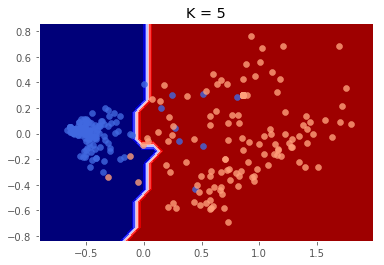

In [183]:
plotDecisionBoundary(knmodel, data_test, label_test)